# ChebLieNet: heat diffusion on Lie groups


In [1]:
import torch
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [2]:
from cheblienet.graphs.graphs import SE2GEGraph, SO3GEGraph, S2GEGraph, R2GEGraph, RandomSubGraph
from cheblienet.graphs.viz import visualize_graph_signal
from cheblienet.utils.utils import delta_kronecker

In [3]:
se2_graph = SE2GEGraph(
    size=[25, 25, 6],
    K=16,
    sigmas= (1., 0.1, 0.0026), #(1., 1., 2.048 / (28 ** 2)), #0.1, 2.048 / (28 ** 2)),
    path_to_graph="saved_graphs"
)

Graph does not already exist: INITIALIZATION...
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3750/3750 [00:18<00:00, 204.19it/s]
Done!
Saved!


In [4]:
r2_graph = R2GEGraph(
    size=[25, 25, 1],
    K=8,
    sigmas=(1., 1., 1.),
    path_to_graph="saved_graphs",
)

Graph does not already exist: INITIALIZATION...
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 625/625 [00:00<00:00, 1953.48it/s]
Done!
Saved!


In [5]:
def visualize_graph_diffusion(graph, tau, tol=1e-4):
    input = delta_kronecker((graph.num_vertices), graph.centroid_vertex)
    
    L, M = graph.dim
    X, Y, Z = graph.cartesian_pos()
    
    fig = plt.figure(figsize=(10, 10))
    
    graph_kernel = graph.diff_kernel(lambda x: np.exp(-tau*x))
    signal = (graph_kernel @ input)
    mask = signal > tol

    ax = fig.add_subplot(projection='3d')
    ax.scatter(X, Y, Z, color="none", edgecolor="black", s=50, alpha=0.2)
    ax.scatter(X[mask], Y[mask], Z[mask], c=signal[mask], s=50, cmap="cividis")
    ax.set_xlabel(fr"$x$")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    #fig.tight_layout()

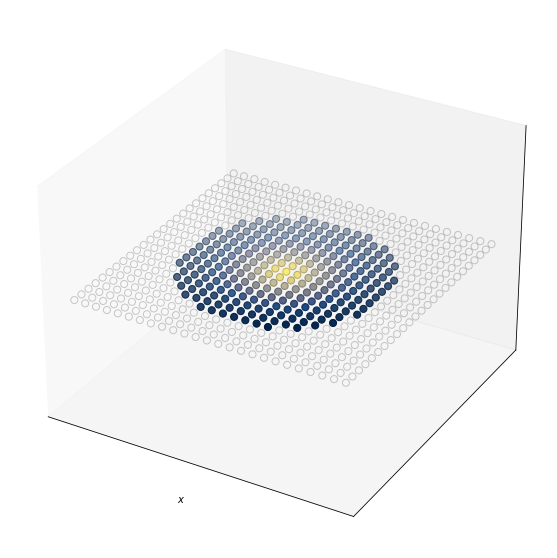

In [6]:
visualize_graph_diffusion(r2_graph, 10.)